# Import Library

In [1]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import sklearn
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import time

# Load dataset

In [2]:
data = pd.read_csv('data bocor-new1.csv', sep=',', encoding='utf-8') 
data

,time,id,username,text
0,2021-11-21 23:56:14+00:00,1462570580775821313,BukanBuTejo,b'@txtdaritekno Gak usah sok keren data bocor ...
1,2021-11-21 16:35:53+00:00,1462459765494214661,Syan~GA ALBUM~CEK PINNED,b'@ameamakunai Bisa aja email kak ame bocor tr...
2,2021-11-21 14:52:08+00:00,1462433655008030720,Ivoox Indonesia,b'Data yang Bocor Berpotensi Disalahgunakan Pe...
3,2021-11-21 14:41:13+00:00,1462430907277529095,🦈 SUROBOYOFESS 🐊,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...
4,2021-11-21 11:44:12+00:00,1462386359386222594,Aktual Official,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...
...,...,...,...,...
204,2021-11-14 04:06:06+00:00,1459734360815386626,drama alter,"b'SUBES !! HALLO SUBES !! \n""Kebenaran akan da..."
205,2021-11-14 03:16:26+00:00,1459721858727612419,꧁jajansai~redi sealed memo20+POB꧂,b'@bonvoyajeon Tp kl aku kasih ripiw pasti aku...
206,2021-11-14 00:05:02+00:00,1459673694964379651,Jawa Pos,b'Teror Penagihan hingga Ancaman Data Pribadi ...
207,2021-11-13 17:09:33+00:00,1459569133096341506,CanduKenikmatan,"b'@rindubulanq @New_boyz_Sby tambahan tips, ka..."


# Hapus kolom yang tidak dibutuhkan dalam proses

In [3]:
data = data.drop(data.columns[[0,1,2]], axis=1)
data.head()

,text
0,b'@txtdaritekno Gak usah sok keren data bocor ...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...


# Pelabelan pertama (pelabelan sebelum proses preprocessing)
> pelabelan dengan cleaning saja

In [4]:
#pelabelan dengan textblob diawal

def text_blop(txt):
    clean = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",txt).split())
    text = TextBlob(clean)
    
    try:
      text = text.translate(to="en")
      time.sleep(1)
    except Exception as e:
      print(e)

    if text.sentiment.polarity > 0.0:
      hasil = "Positif"
    
    elif text.sentiment.polarity == 0.0:
      hasil = "Netral"

    else:
      hasil = "Negatif"

    return hasil

data['label_1'] = data['text'].apply(lambda x: text_blop(x))
data.head()  

Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.


,text,label_1
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral


# Cleaning

In [5]:
# Removing Punctuationtrain

import string
import re
string.punctuation

def remove_punctuation(txt):
    '''a function for removing punctuation'''
    text = txt[1:]
    text = re.sub('@[^\s]+','',text)
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub("#\S+", " ", text)
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('  ', '', text)
    return text

data['clean'] = data['text'].apply(lambda x: remove_punctuation(x))
data.head()

,text,label_1,clean
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa


# Casefolding

In [6]:
# Casefolding

def casefolding(txt):
    text = str(txt).lower()
    return text

data['casefolding'] = data['clean'].apply(lambda x: casefolding(x))
data.head()

,text,label_1,clean,casefolding
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa


# Tokenize

In [7]:
#tokenizing
def tokenize(kalimat):
    text = word_tokenize(kalimat)
    return text

data['tokenize'] = data['casefolding'].apply(lambda x: tokenize(x))
data.head()

,text,label_1,clean,casefolding,tokenize
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"[gak, usah, sok, keren, data, bocor, di, darkw..."
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"[bisa, aja, email, kak, ame, bocor, trus, ada,..."
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"[data, yang, bocor, berpotensi, disalahgunakan..."
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"[kok, data, lu, bocor, yaa, hmm, isok, ae, lak..."
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"[cissrec, sebut, data, pribadi, bocor, bisa]"


# Filtering atau Stopwords

In [8]:
#filtering

def stopwords_removal(txt):
  filtering = stopwords.words('indonesian', 'english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, txt)
  for x in fit:
    data.append(x)
  return data

data['stopwords'] = data['tokenize'].apply(lambda x: stopwords_removal(x))
data.head()

,text,label_1,clean,casefolding,tokenize,stopwords
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"[gak, usah, sok, keren, data, bocor, di, darkw...","[gak, sok, keren, data, bocor, darkweb, warga,..."
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"[bisa, aja, email, kak, ame, bocor, trus, ada,...","[aja, email, kak, ame, bocor, trus, nomornya, ..."
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"[data, yang, bocor, berpotensi, disalahgunakan...","[data, bocor, berpotensi, disalahgunakan, pela..."
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"[kok, data, lu, bocor, yaa, hmm, isok, ae, lak...","[data, lu, bocor, yaa, hmm, isok, ae, lak, mbu..."
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"[cissrec, sebut, data, pribadi, bocor, bisa]","[cissrec, data, pribadi, bocor]"


# Stemming dengan sastrawi

In [9]:
#stemming

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(txt):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in txt:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

data['stemming'] = data['stopwords'].apply(lambda x: stemming(x))
data.head()

data.to_csv('data_clean_v2.csv', index=False)
data_clean = pd.read_csv('data_clean_v2.csv', encoding='latin1')
data_clean.head()

gak sok keren data bocor darkweb warga negara udah bocor data ktp amp kk bungkus kacang amp goreng
aja email kak ame bocor trus nomor nyambung email mending cari getcontact trus diblock kak kalo ngga kenal ngatasin data bocor
data bocor potensi disalahgunakan laku terorisme
data lu bocor yaa hmm isok ae lak mbujuki rek
cissrec data pribadi bocor
nasabah daya data bocor halus kirain bank beneran percaya ngeles jebak betmen
banget lho risiko data pribadi bocor sobat keva hatihati jaga data pribadi data tangan tanggung jawabnn
cissrec teroris pakai data wni bocor rekrut anggota
data bocor laku terorismenn
baik kali bokdata ktp bocor
data bocor
gilaa ngaku pinjol nelp mutual twitter gw gw gakpunya nomernya tau nama lengkap gue alamat rem banget pas cek nomernya getcontact yaa tau data gw bocor
buatpengguna smartphone gak takut data bocor ya emang udah bocor
gin ya pasang app dihp dimintain tuju hubung dengn apa dihp izin gak langsung izin data identitas bocor jdi jgn heran
algoritma jelasi

,text,label_1,clean,casefolding,tokenize,stopwords,stemming
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"['gak', 'usah', 'sok', 'keren', 'data', 'bocor...","['gak', 'sok', 'keren', 'data', 'bocor', 'dark...",gak sok keren data bocor darkweb warga negara ...
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"['bisa', 'aja', 'email', 'kak', 'ame', 'bocor'...","['aja', 'email', 'kak', 'ame', 'bocor', 'trus'...",aja email kak ame bocor trus nomor nyambung em...
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"['data', 'yang', 'bocor', 'berpotensi', 'disal...","['data', 'bocor', 'berpotensi', 'disalahgunaka...",data bocor potensi disalahgunakan laku terorisme
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"['kok', 'data', 'lu', 'bocor', 'yaa', 'hmm', '...","['data', 'lu', 'bocor', 'yaa', 'hmm', 'isok', ...",data lu bocor yaa hmm isok ae lak mbujuki rek
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"['cissrec', 'sebut', 'data', 'pribadi', 'bocor...","['cissrec', 'data', 'pribadi', 'bocor']",cissrec data pribadi bocor


# Pelabelan ke 2 (pelabelan setelah proses preprocessing)

In [10]:
#pelabelan dengan textblob diakhir (setelah stemming)

# Casefolding

def text_blop(txt):
    text = TextBlob(str(txt))
    
    try:
      text = text.translate(to="en")
      time.sleep(1)
    except Exception as e:
      print(e)

    if text.sentiment.polarity > 0.0:
      hasil = "Positif"
    
    elif text.sentiment.polarity == 0.0:
      hasil = "Netral"

    else:
      hasil = "Negatif"

    return hasil

data_clean['label_2'] = data_clean['stemming'].apply(lambda x: text_blop(x))
data_clean.head()

Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.
Translation API returned the input string unchanged.


,text,label_1,clean,casefolding,tokenize,stopwords,stemming,label_2
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"['gak', 'usah', 'sok', 'keren', 'data', 'bocor...","['gak', 'sok', 'keren', 'data', 'bocor', 'dark...",gak sok keren data bocor darkweb warga negara ...,Negatif
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"['bisa', 'aja', 'email', 'kak', 'ame', 'bocor'...","['aja', 'email', 'kak', 'ame', 'bocor', 'trus'...",aja email kak ame bocor trus nomor nyambung em...,Positif
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"['data', 'yang', 'bocor', 'berpotensi', 'disal...","['data', 'bocor', 'berpotensi', 'disalahgunaka...",data bocor potensi disalahgunakan laku terorisme,Netral
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"['kok', 'data', 'lu', 'bocor', 'yaa', 'hmm', '...","['data', 'lu', 'bocor', 'yaa', 'hmm', 'isok', ...",data lu bocor yaa hmm isok ae lak mbujuki rek,Netral
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"['cissrec', 'sebut', 'data', 'pribadi', 'bocor...","['cissrec', 'data', 'pribadi', 'bocor']",cissrec data pribadi bocor,Netral


# Tampilan Semua Data

In [11]:
data_clean

,text,label_1,clean,casefolding,tokenize,stopwords,stemming,label_2
0,b'@txtdaritekno Gak usah sok keren data bocor ...,Positif,Gak usah sok keren data bocor di darkweb kare...,gak usah sok keren data bocor di darkweb kare...,"['gak', 'usah', 'sok', 'keren', 'data', 'bocor...","['gak', 'sok', 'keren', 'data', 'bocor', 'dark...",gak sok keren data bocor darkweb warga negara ...,Negatif
1,b'@ameamakunai Bisa aja email kak ame bocor tr...,Positif,Bisa aja email kak ame bocor trus ada nomorny...,bisa aja email kak ame bocor trus ada nomorny...,"['bisa', 'aja', 'email', 'kak', 'ame', 'bocor'...","['aja', 'email', 'kak', 'ame', 'bocor', 'trus'...",aja email kak ame bocor trus nomor nyambung em...,Positif
2,b'Data yang Bocor Berpotensi Disalahgunakan Pe...,Netral,Data yang Bocor Berpotensi Disalahgunakan Pela...,data yang bocor berpotensi disalahgunakan pela...,"['data', 'yang', 'bocor', 'berpotensi', 'disal...","['data', 'bocor', 'berpotensi', 'disalahgunaka...",data bocor potensi disalahgunakan laku terorisme,Netral
3,b'Kok data lu bocor yaa?? Hmm isok ae lak mbuj...,Netral,Kok data lu bocor yaa Hmm isok ae lak mbujuki ...,kok data lu bocor yaa hmm isok ae lak mbujuki ...,"['kok', 'data', 'lu', 'bocor', 'yaa', 'hmm', '...","['data', 'lu', 'bocor', 'yaa', 'hmm', 'isok', ...",data lu bocor yaa hmm isok ae lak mbujuki rek,Netral
4,b'CISSReC Sebut Data Pribadi Bocor Bisa Diguna...,Netral,CISSReC Sebut Data Pribadi Bocor Bisa,cissrec sebut data pribadi bocor bisa,"['cissrec', 'sebut', 'data', 'pribadi', 'bocor...","['cissrec', 'data', 'pribadi', 'bocor']",cissrec data pribadi bocor,Netral
...,...,...,...,...,...,...,...,...
204,"b'SUBES !! HALLO SUBES !! \n""Kebenaran akan da...",Positif,SUBESHALLO SUBESnKebenaran akan datang pada wa...,subeshallo subesnkebenaran akan datang pada wa...,"['subeshallo', 'subesnkebenaran', 'akan', 'dat...","['subeshallo', 'subesnkebenaran', 'yg', 'ndr',...",subeshallo subesnkebenaran yg ndr case bbrp po...,Netral
205,b'@bonvoyajeon Tp kl aku kasih ripiw pasti aku...,Netral,Tp kl aku kasih ripiw pasti aku pilih tanpa u...,tp kl aku kasih ripiw pasti aku pilih tanpa u...,"['tp', 'kl', 'aku', 'kasih', 'ripiw', 'pasti',...","['tp', 'kl', 'kasih', 'ripiw', 'pilih', 'uname...",tp kl kasih ripiw pilih uname data bocor,Netral
206,b'Teror Penagihan hingga Ancaman Data Pribadi ...,Netral,Teror Penagihan hingga Ancaman Data Pribadi Bo...,teror penagihan hingga ancaman data pribadi bo...,"['teror', 'penagihan', 'hingga', 'ancaman', 'd...","['teror', 'penagihan', 'ancaman', 'data', 'pri...",teror tagih ancam data pribadi bocor,Netral
207,"b'@rindubulanq @New_boyz_Sby tambahan tips, ka...",Positif,tambahan tips kalo ada keperluan yang mengharu...,tambahan tips kalo ada keperluan yang mengharu...,"['tambahan', 'tips', 'kalo', 'ada', 'keperluan...","['tambahan', 'tips', 'kalo', 'keperluan', 'men...",tambah tips kalo perlu harus ktp lupa foto ktp...,Netral


# Plot the word cloud

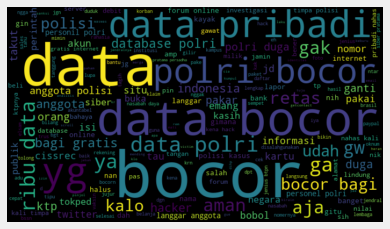

In [12]:
#plot the word cloud

allwords = ' '.join([str(twts) for twts in data_clean['stemming']])
wordCloud = WordCloud(width = 700, height = 400, random_state = 21, max_font_size = 119).generate(allwords)


plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Grafik persebaran data berdasarkan pelabelan sebelum proses preprocessing

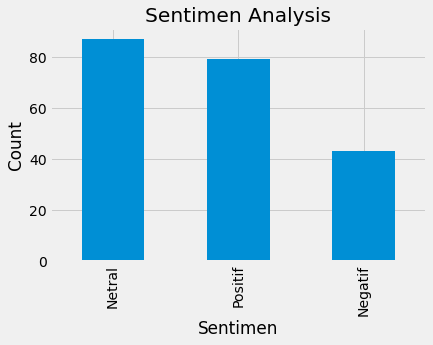

In [14]:
#grafik sentimen analis dengan pelabelan diawal

data_clean['label_1'].value_counts()

plt.title('Sentimen Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Count')
data_clean['label_1'].value_counts().plot(kind='bar')
plt.show()

# Grafik persebaran data berdasarkan pelabelan setelah proses preprocessing

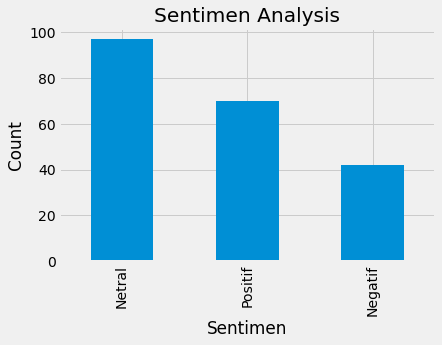

In [15]:
#grafik sentimen analis dengan pelabelan diakhir (setelah preprocessing)

data_clean['label_2'].value_counts()

plt.title('Sentimen Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Count')
data_clean['label_2'].value_counts().plot(kind='bar')
plt.show()

# Ubah tipe data untuk label_1, label_2, dan stemming

In [16]:
data_clean = data_clean.astype({'label_1' : 'category'})
data_clean = data_clean.astype({'label_2' : 'category'})
data_clean = data_clean.astype({'stemming' : 'string'})
data_clean.dtypes

text             object
label_1        category
clean            object
casefolding      object
tokenize         object
stopwords        object
stemming         string
label_2        category
dtype: object

# Pembobotan TF-IDF

In [17]:
#Pembobotan TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['stemming'].astype('U'))
print(text_tf)

  (0, 328)	0.27812585178483534
  (0, 424)	0.27812585178483534
  (0, 161)	0.27812585178483534
  (0, 460)	0.27812585178483534
  (0, 32)	0.46610457677634276
  (0, 486)	0.20413827825735842
  (0, 960)	0.18240393578524997
  (0, 596)	0.2165007702280527
  (0, 996)	0.2581804822424983
  (0, 202)	0.27812585178483534
  (0, 127)	0.1087483165452664
  (0, 203)	0.10979495054308881
  (0, 451)	0.27812585178483534
  (0, 860)	0.27812585178483534
  (0, 298)	0.17004144381455571
  (1, 607)	0.21814052763389535
  (1, 450)	0.21814052763389535
  (1, 612)	0.1913975930657248
  (1, 430)	0.14901104461593492
  (1, 230)	0.21814052763389535
  (1, 310)	0.20249691375227605
  (1, 171)	0.21814052763389535
  (1, 554)	0.20249691375227605
  (1, 640)	0.21814052763389535
  (1, 628)	0.16465465849755423
  :	:
  (207, 439)	0.3428490354966522
  (207, 290)	0.17949858765076637
  (207, 525)	0.17949858765076637
  (207, 1017)	0.10425753198647061
  (207, 665)	0.15441823576266778
  (207, 430)	0.2794943408064781
  (207, 486)	0.300312913863

# Classifikasi dengan pelabelan diawal atau sebelum proses preprocessing

In [18]:
# # split data into sets
# train 80% test 20%
# pelabelan di awal

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['label_1'],test_size=0.2, random_state = 42)

## Classifikasi dengan naive bayes

In [19]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predicted))

print(f'confussion matrix:\n {confusion_matrix(y_test, predicted)}')
print("----------------------------------------")
print(classification_report(y_test, predicted, zero_division=0))

Accuracy :  0.40476190476190477
confussion matrix:
 [[ 0  8  2]
 [ 0 12  2]
 [ 0 13  5]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        10
      Netral       0.36      0.86      0.51        14
     Positif       0.56      0.28      0.37        18

    accuracy                           0.40        42
   macro avg       0.31      0.38      0.29        42
weighted avg       0.36      0.40      0.33        42



## Classifikasi dengan SVM

In [20]:
#SVM

from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)

predictions_SVM = SVM.predict(X_test)

print("SVM Accuracy Score -> ",accuracy_score(y_test, predictions_SVM)*100)
print(f'confussion matrix:\n {confusion_matrix(y_test, predictions_SVM)}')
print("----------------------------------------")
print(classification_report(y_test, predictions_SVM))

SVM Accuracy Score ->  50.0
confussion matrix:
 [[ 2  5  3]
 [ 1 11  2]
 [ 2  8  8]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       0.40      0.20      0.27        10
      Netral       0.46      0.79      0.58        14
     Positif       0.62      0.44      0.52        18

    accuracy                           0.50        42
   macro avg       0.49      0.48      0.45        42
weighted avg       0.51      0.50      0.48        42



# Classifikasi dengan pelabelan setelah proses preporcessing

In [21]:
# # split data into sets
# train 80% test 20%
# pelabelan di akhir

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(text_tf, data_clean['label_2'],test_size=0.2, random_state = 42)

## Classifikasi dengan naive bayes

In [22]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf_2 = MultinomialNB().fit(X_train_2, y_train_2)
predicted_2 = clf_2.predict(X_test_2)
print("Accuracy : ", accuracy_score(y_test_2, predicted_2))

print(f'confussion matrix:\n {confusion_matrix(y_test_2, predicted_2)}')
print("----------------------------------------")
print(classification_report(y_test_2, predicted_2, zero_division=0))

Accuracy :  0.6666666666666666
confussion matrix:
 [[ 1  4  0]
 [ 0 23  0]
 [ 0 10  4]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       1.00      0.20      0.33         5
      Netral       0.62      1.00      0.77        23
     Positif       1.00      0.29      0.44        14

    accuracy                           0.67        42
   macro avg       0.87      0.50      0.51        42
weighted avg       0.79      0.67      0.61        42



## Classifikasi dengan SVM

In [23]:
#SVM

from sklearn import svm

SVM_2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_2.fit(X_train_2, y_train_2)

predictions_SVM_2 = SVM_2.predict(X_test_2)

print("SVM Accuracy Score -> ",accuracy_score(y_test, predictions_SVM_2)*100)
print(f'confussion matrix:\n {confusion_matrix(y_test, predictions_SVM_2)}')
print("----------------------------------------")
print(classification_report(y_test_2, predictions_SVM_2))

SVM Accuracy Score ->  47.61904761904761
confussion matrix:
 [[ 2  4  4]
 [ 0 12  2]
 [ 1 11  6]]
----------------------------------------
              precision    recall  f1-score   support

     Negatif       0.67      0.40      0.50         5
      Netral       0.67      0.78      0.72        23
     Positif       0.58      0.50      0.54        14

    accuracy                           0.64        42
   macro avg       0.64      0.56      0.59        42
weighted avg       0.64      0.64      0.63        42

